## KNeighbors model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

In [ ]:
path = "/content/drive/MyDrive/Machine Learning/OnlineNewsPopularityReduced.csv"
df = pd.read_csv(path)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,4954.0,49.628381,22.589941,8.000000,30.000000,50.000000,68.000000,101.000000
n_tokens_title,4954.0,11.201857,2.182106,3.000000,10.000000,11.000000,13.000000,23.000000
n_tokens_content,4954.0,550.405733,457.900604,0.000000,256.000000,436.000000,753.750000,6159.000000
n_unique_tokens,4954.0,0.478429,0.180073,0.000000,0.445631,0.515556,0.579986,1.000000
n_non_stop_words,4954.0,0.901494,0.298028,0.000000,1.000000,1.000000,1.000000,1.000000
n_non_stop_unique_tokens,4954.0,0.616601,0.220690,0.000000,0.608315,0.671141,0.731024,1.000000
num_hrefs,4954.0,10.355874,12.529856,0.000000,3.000000,7.000000,13.000000,304.000000
num_self_hrefs,4954.0,2.677634,3.402775,0.000000,1.000000,2.000000,3.000000,65.000000
num_imgs,4954.0,3.572467,5.979075,0.000000,1.000000,1.000000,3.000000,77.000000
num_videos,4954.0,1.172184,3.766454,0.000000,0.000000,0.000000,1.000000,50.000000


Deletes unnecessary columns and those records where 0 words

In [ ]:
df.drop(labels=['url', 'timedelta'], axis = 1, inplace=True)
df = df[df.n_tokens_content != 0]

In [ ]:
df.kw_min_min.value_counts()

-1    4466
Name: kw_min_min, dtype: int64

We have an uninformative column, we delete should it

In [ ]:
df.drop('kw_min_min', axis = 1, inplace = True)

The distribution of our target variable looks like this:

<Axes: xlabel='shares', ylabel='Density'>

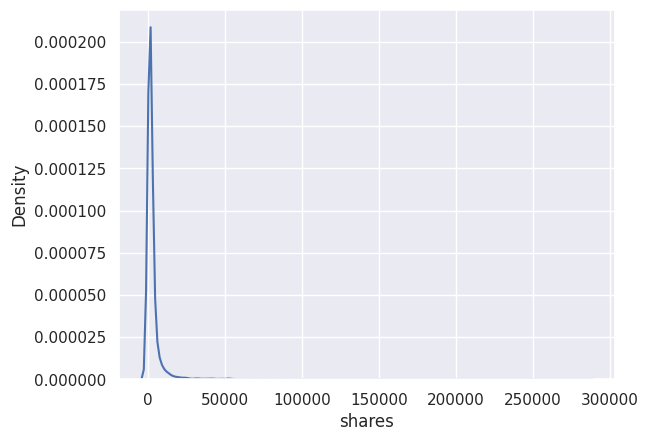

In [ ]:
sns.kdeplot(df, x='shares')

<Axes: xlabel='shares', ylabel='Density'>

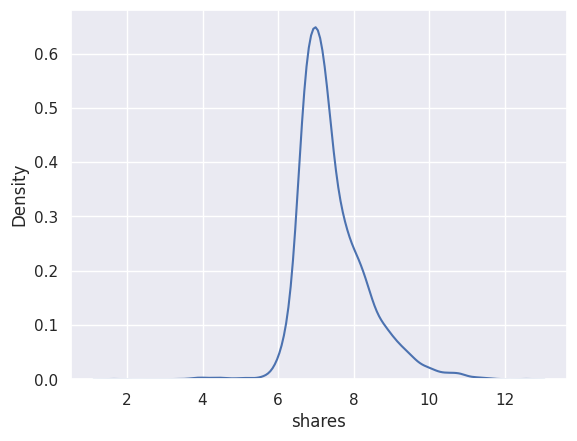

In [ ]:
sns.kdeplot(np.log(df['shares']))


As we can see, our distribution is lognormal

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


X = df.drop('shares', axis=1)
y = df['shares']

scaler = StandardScaler()
X_st = scaler.fit_transform(X)


X_train, X_valid, y_train, y_valid = train_test_split(X_st, y, test_size=0.25, random_state=13)
knn = KNeighborsRegressor(n_neighbors=30)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print('mean_squared_error:',mean_squared_error(y_valid, y_pred))

mean_squared_error: 23933737.929492686


We see that our estimate is very far from ideal (ideal is close to 0.0), so let's try to move from the regression problem to the classification problem. Let's make our 'shares' variable categorical, where:
* Good >10 000 -- 2
* Average >2 500 <=10 000 -- 1
* Poor <=2 500 -- 0




In [ ]:
df['shares'].describe(percentiles=[0.25,0.50,0.75])

count      4466.000000
mean       3006.599418
std        7421.797517
min           5.000000
25%         939.250000
50%        1400.000000
75%        2600.000000
max      284700.000000
Name: shares, dtype: float64

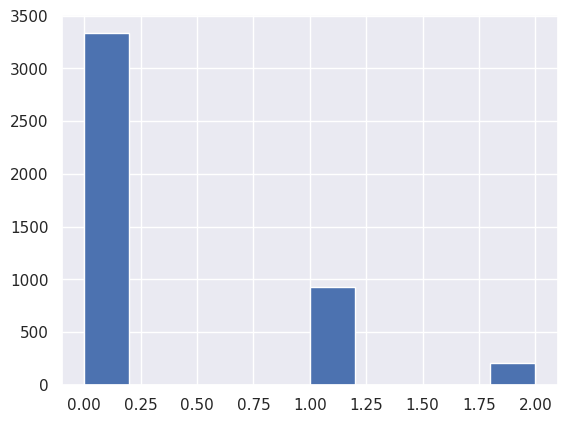

0    3337
1     925
2     204
Name: shares, dtype: int64

In [ ]:
def mapping(x):
    if x <= 2500:
        return 0
    elif 2500 < x <= 10000:
        return 1
    elif x>10000:
        return 2

df_classification = df.copy()
df_classification['shares'] = df_classification['shares'].map(mapping)
df_classification['shares'].hist()
plt.show()
df_classification['shares'].value_counts()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score

X = df_classification.drop('shares', axis=1)
y = df_classification['shares']

scaler = StandardScaler()
X_st = scaler.fit_transform(X)


X_train, X_valid, y_train, y_valid = train_test_split(X_st, y, test_size=0.25, random_state=4)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
print('accuracy_score:', accuracy_score(y_valid, y_pred))

accuracy_score: 0.7529095792300806


We have 75.3% prediction accuracy, which is pretty good result for this dataset

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=30)
scores = cross_val_score(knn, X_st, y, cv=kf, scoring='accuracy')

print('array of accuracy scores for each fold:', scores)
print(' the mean accuracy score across all folds:', np.mean(scores))

array of accuracy scores for each fold: [0.73825503 0.74468085 0.75475924 0.74020157 0.75027996]
 the mean accuracy score across all folds: 0.7456353292198081


Let`s find best hyperparametrs for knn model

In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

knn_params = {'n_neighbors': np.arange(1, 51)} # можно взяти крок 2

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='accuracy')

In [ ]:
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

{'n_neighbors': 42}
KNeighborsClassifier(n_neighbors=42)


In [ ]:
pd.DataFrame(knn_grid.cv_results_).sort_values(by="rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.001327,0.000050,0.054990,0.001696,42,{'n_neighbors': 42},0.749254,0.747761,0.747761,0.744776,0.747384,0.747387,0.001455,1
22,0.003291,0.002659,0.106318,0.018907,23,{'n_neighbors': 23},0.747761,0.746269,0.747761,0.749254,0.745889,0.747387,0.001205,2
35,0.001124,0.000062,0.055500,0.002777,36,{'n_neighbors': 36},0.749254,0.746269,0.749254,0.746269,0.745889,0.747387,0.001531,3
47,0.001173,0.000054,0.062703,0.008734,48,{'n_neighbors': 48},0.749254,0.747761,0.746269,0.744776,0.747384,0.747089,0.001500,4
42,0.001239,0.000079,0.055495,0.003159,43,{'n_neighbors': 43},0.749254,0.747761,0.746269,0.744776,0.747384,0.747089,0.001500,4


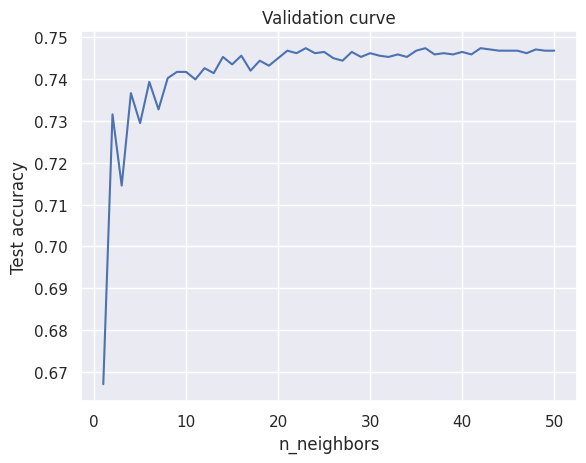

In [ ]:
results_df = pd.DataFrame(knn_grid.cv_results_)
plt.plot(results_df['param_n_neighbors'], results_df['mean_test_score'])


plt.xlabel('n_neighbors')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

In [ ]:
p_values = np.linspace(1, 10, 20)

knn = KNeighborsClassifier(n_neighbors=50, weights='distance')

param_grid = {'p': p_values}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_st, y)

# Get the results of the grid search
results = grid_search.cv_results_

# Find the best value of p
best_p = results['param_p'][np.argmax(results['mean_test_score'])]
best_accuracy = np.max(results['mean_test_score'])

print("Best p:", best_p)
print("Best Accuracy:", best_accuracy)

Best p: 6.2105263157894735
Best Accuracy: 0.7485446087015339


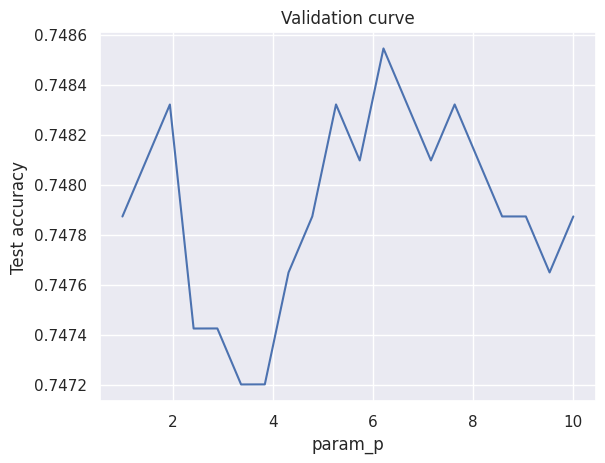

In [ ]:
results_df = pd.DataFrame(results)
plt.plot(results_df['param_p'], results_df['mean_test_score'])


plt.xlabel('param_p')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

The most effective power parameter for the Minkowski metric turned out to be the value p=1. That is, the Manhattan distance shows itself best. The best n_neighbors value is 42. Best score: 74.85%

Let's try other neigbors models

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

Rnc = RadiusNeighborsClassifier(radius=300, weights ='distance')

kf = KFold(n_splits=5, shuffle=True, random_state=23)
scores = cross_val_score(Rnc, X_st, y, cv=kf, scoring='accuracy')

print('array of accuracy scores for each fold:', scores)
print(' the mean accuracy score across all folds:', np.mean(scores))

array of accuracy scores for each fold: [0.74496644 0.73460246 0.75699888 0.74132139 0.7581187 ]
 the mean accuracy score across all folds: 0.7472015752647362


In [ ]:
from sklearn.neighbors import NearestCentroid

nn = NearestCentroid()

kf = KFold(n_splits=5, shuffle=True, random_state=23)
scores = cross_val_score(nn, X_st, y, cv=kf, scoring='accuracy')

print('array of accuracy scores for each fold:', scores)
print(' the mean accuracy score across all folds:', np.mean(scores))

array of accuracy scores for each fold: [0.49440716 0.53863382 0.537514   0.52295633 0.52071669]
 the mean accuracy score across all folds: 0.5228455975008204


A good result shows RadiusNeighborsClassifier.